<a href="https://colab.research.google.com/github/eliponc-code/sim-mat-2025/blob/main/Tarea_2_2_Simulaci%C3%B3n_de_escenarios_futuros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar los precios de Amazon desde Yahoo finance de los últimos 10 años y simular cien mil escenarios de los próximos 30 días para predecir la probabilidad de que el precio actual supere el 8%.

/tmp/ipython-input-4022070906.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2015-11-4',end='2025-11-4')['Close']
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

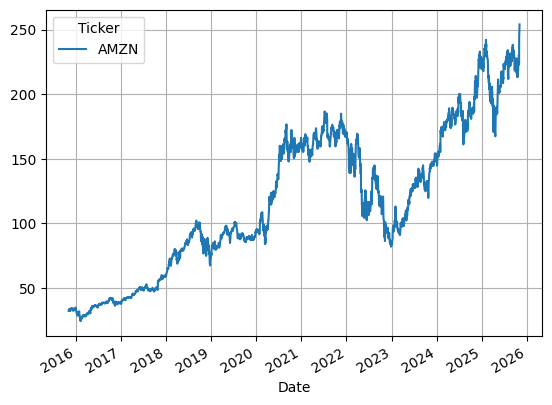

In [40]:
import numpy as np
import pandas as pd
import yfinance as yf

tickers=['AMZN']
data=yf.download(tickers,start='2015-11-4',end='2025-11-4')['Close']
data.plot(grid=True)

<Axes: xlabel='Date'>

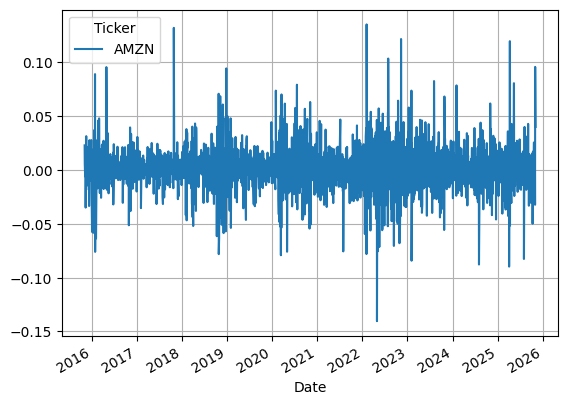

In [41]:
delta=data.pct_change().dropna()
delta.plot(grid=True)

array([[<Axes: title={'center': 'AMZN'}>]], dtype=object)

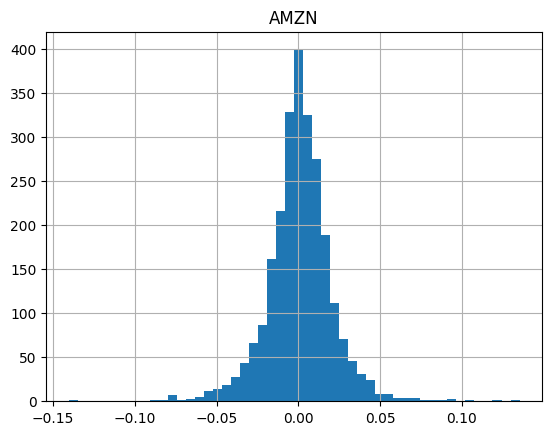

In [42]:
delta.hist(bins=50,grid=True)

In [43]:
N_dias=30
N_escenarios=100000
delta_AMZN=np.random.normal(delta['AMZN'].mean(),delta['AMZN'].std(),(N_dias,N_escenarios))
delta_AMZN

array([[-0.02537581,  0.01065842, -0.04328405, ...,  0.02547703,
        -0.00944572, -0.03749464],
       [-0.0194119 , -0.00878786,  0.0028672 , ...,  0.01796984,
        -0.04043388,  0.01572575],
       [ 0.00175406,  0.02077497,  0.03849869, ..., -0.02907388,
         0.01354236, -0.03651918],
       ...,
       [-0.01550956,  0.05513849, -0.0011451 , ..., -0.01063485,
         0.01862185, -0.00899096],
       [ 0.02577593,  0.00014678, -0.04468061, ...,  0.00054294,
         0.00147379,  0.01408791],
       [ 0.02572986, -0.00834392, -0.01622681, ...,  0.00511194,
         0.00605517,  0.03242717]])

In [44]:
rango_tiempo=pd.date_range('2025-11-4',periods=N_dias)
rango_tiempo

DatetimeIndex(['2025-11-04', '2025-11-05', '2025-11-06', '2025-11-07',
               '2025-11-08', '2025-11-09', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-15',
               '2025-11-16', '2025-11-17', '2025-11-18', '2025-11-19',
               '2025-11-20', '2025-11-21', '2025-11-22', '2025-11-23',
               '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-27',
               '2025-11-28', '2025-11-29', '2025-11-30', '2025-12-01',
               '2025-12-02', '2025-12-03'],
              dtype='datetime64[ns]', freq='D')

In [45]:
delta_AMZN=pd.DataFrame(delta_AMZN,index=rango_tiempo)
delta_AMZN

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2025-11-04,-0.025376,0.010658,-0.043284,0.030062,0.017347,-0.021940,0.008823,0.004817,-0.047988,-0.002123,...,0.008100,-0.021519,-0.016639,0.013695,0.019412,-0.026570,-0.002892,0.025477,-0.009446,-0.037495
2025-11-05,-0.019412,-0.008788,0.002867,0.013185,0.032361,0.014594,-0.048871,-0.012207,0.009251,-0.018760,...,-0.027727,-0.011407,0.040266,-0.002577,-0.030400,-0.004514,-0.036999,0.017970,-0.040434,0.015726
2025-11-06,0.001754,0.020775,0.038499,0.015024,0.017236,-0.003070,-0.010925,0.018164,0.026296,-0.041780,...,0.007582,-0.017658,-0.008107,-0.033727,0.018048,0.000304,-0.005086,-0.029074,0.013542,-0.036519
2025-11-07,0.008768,-0.025282,-0.000757,-0.038135,0.015377,0.019553,-0.006072,-0.022560,0.035686,-0.002743,...,-0.002936,-0.031058,-0.011315,-0.002342,-0.015295,0.035460,-0.000583,0.016820,-0.000135,0.022166
2025-11-08,0.032950,0.006070,0.007219,0.025497,-0.016862,-0.029345,-0.010144,-0.008357,-0.006124,-0.001270,...,0.001948,-0.015631,-0.002550,0.017788,0.003668,0.021254,0.007003,-0.019584,-0.038056,0.039293
2025-11-09,-0.011208,-0.002084,-0.008921,0.011815,-0.012124,0.027446,0.004040,0.018732,0.040356,-0.004257,...,0.014696,-0.001304,0.002361,0.019492,-0.022648,0.005461,-0.000171,-0.000299,-0.004946,-0.017167
2025-11-10,-0.010311,-0.006676,-0.001829,-0.013045,0.012842,0.018969,0.001644,0.008390,0.001247,0.006421,...,0.015099,0.012738,0.008521,0.024514,-0.028356,-0.009796,0.010360,0.009812,-0.021077,0.003712
2025-11-11,-0.014637,-0.018504,0.041113,0.020992,0.011397,-0.003152,-0.008012,0.015611,0.020846,-0.023002,...,0.002279,-0.004573,0.011746,-0.019283,0.006040,0.018176,-0.025385,0.012865,-0.022945,-0.000150
2025-11-12,0.018851,0.014812,-0.029147,0.019497,-0.026574,-0.020052,0.036741,0.000369,0.004399,0.022690,...,-0.030265,-0.007997,-0.012410,0.058725,-0.004038,0.041767,0.010143,-0.028551,-0.021795,-0.000911
2025-11-13,0.011720,0.006528,0.018158,0.004797,0.004045,-0.035389,0.025386,0.011368,0.023383,0.028457,...,0.003947,-0.018630,-0.000897,0.020520,0.071673,-0.016400,0.018790,-0.008021,-0.008575,-0.023699


In [46]:
precios_AMZN=data['AMZN'].iloc[-1]*((delta_AMZN+1).cumprod())
precios_AMZN.iloc[:2,:5]

,0,1,2,3,4
2025-11-04,247.554544,256.707238,243.005851,261.635862,258.406094
2025-11-05,242.749040,254.451329,243.702598,265.085579,266.768443


<Axes: >

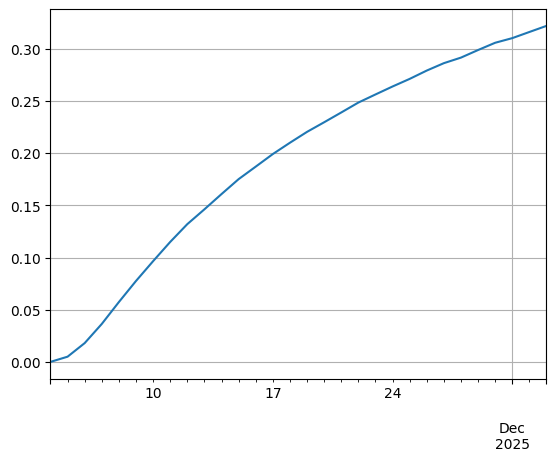

In [47]:
B_AMZN=precios_AMZN>data['AMZN'].iloc[-1]*1.08
proba_AMZN=B_AMZN.mean(axis=1)
proba_AMZN.plot(grid=True)

In [48]:
def simulacion(data,ticker,dia_inicial,N_dias,N_escenarios):
  delta=data.pct_change().dropna()
  delta_sim=np.random.normal(delta[ticker].mean(),delta[ticker].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range(dia_inicial,periods=N_dias)
  delta_sim=pd.DataFrame(delta_sim,index=rango_tiempo)
  precios_simulados=data[ticker].iloc[-1]*((delta_sim+1).cumprod())
  B=precios_simulados>data[ticker].iloc[-1]*1.08
  return B.mean(axis=1)

In [49]:
import matplotlib.pyplot as plt

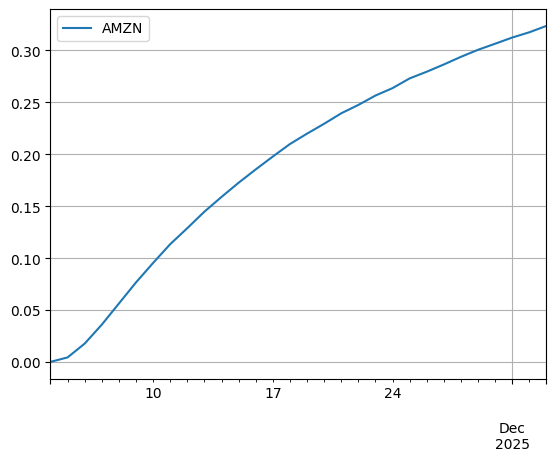

In [50]:
simulacion(data,'AMZN','2025-11-4',30,100000).plot(grid=True,label='AMZN')
plt.legend()